<div style="position:relative;">
<img src=images/matplotlib_med.png style="width: 60px; float: left" />
</div>
<div style="position:relative;">
<img src=images/matplotlib_med.png style="width: 60px; float: right" />
</div>

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Matplotlib

By convention the procedural interface of **matplotlib** is imported as **plt**

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

## Function plotting

Functions can be computed with **NumPy ndarray**s and passed to **matplotlib**'s plot function

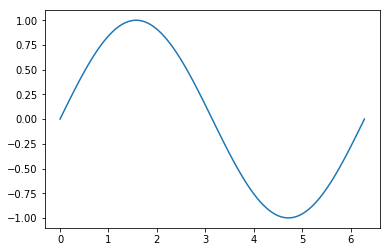

In [4]:
import numpy as np
phi = np.linspace(0, 2.0 * np.pi, 100)
plt.plot(phi, np.sin(phi))

## Errorbar plotting

In physics we usually want to visualize the uncertainties of our values

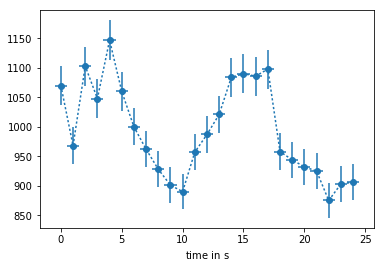

In [138]:
time = np.arange(25)
mean = 100*np.sin(time/2)+1000
events = np.random.poisson(mean)
uncertainty = np.sqrt(events)

plt.errorbar(time, events, xerr=0.5, yerr=uncertainty, ls='dotted', marker='o')
plt.xlabel(r'time in $\mathrm{s}$')

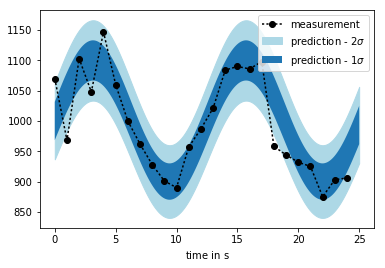

In [139]:
ptime = np.linspace(0, 25, 250)
pmean = 100*np.sin(ptime/2)+1000
puncertainty = np.sqrt(pmean)

plt.fill_between(ptime, pmean+2*puncertainty, pmean-2*puncertainty,
                 label=r'prediction - $2 \sigma$', color='lightblue')
plt.fill_between(ptime, pmean+puncertainty, pmean-puncertainty,
                 label=r'prediction - $1 \sigma$')
plt.plot(time, events, color='black', ls='dotted', marker='o', label='measurement')
plt.xlabel(r'time in $\mathrm{s}$')
plt.legend(loc='upper right')

## Histogram plotting

To study the occurence and distribution of measurement values, histograms can be created with matplotlib

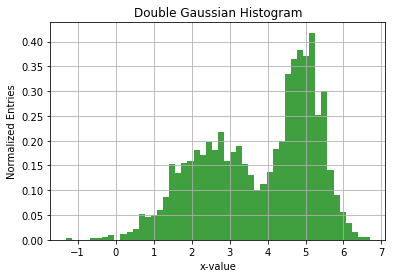

In [11]:
N = 1000
double_gauss = np.hstack([np.random.normal(2.5, 1.0, N), np.random.normal(5, 0.5, N)])
plt.hist(double_gauss, bins=50, normed=True, facecolor='green', alpha=0.75)

plt.xlabel('x-value')
plt.ylabel('Normalized Entries')
plt.title('Double Gaussian Histogram')
plt.grid(True)
plt.show()

## Multiple Plots in one figure

The plot/hist and other draw function can be called multiple times to add more than one graph to a figure.

The legend function can be used to identify individual entries in the figure.

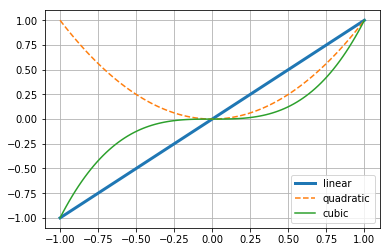

In [9]:
x = np.linspace(-1, 1, 100)
plt.plot(x, x, label='linear', linewidth=3)
plt.plot(x, x**2, label='quadratic', linestyle='--')
plt.plot(x, x**3, label='cubic')

plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Subplots

**matplotlib** distinguishes between a
  * **figure** (the complete image, in ROOT this corresponds to a TCanvas),
  * and **axis** of a figure (a pair of axis creating a coordinate system, in ROOT this corresponds to a TPad).
  
A **figure** can have multiple **axes** and hence multiple subplots.

Pro Tip: The method names for axis objects are slightly different.

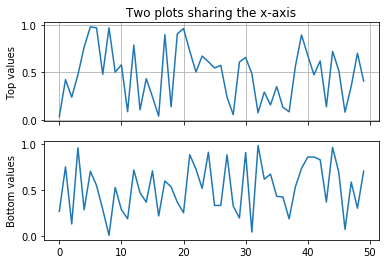

In [10]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.plot(np.random.uniform(size=50))
ax1.set_title('Two plots sharing the x-axis')
ax1.set_ylabel('Top values')
ax1.grid(True)

ax2.plot(np.random.uniform(size=50))
ax2.set_ylabel('Bottom values')
plt.show()

## Scatter and Contour-Plots

In [93]:
from numpy.linalg import inv

mu_s = np.array([-1.0,-1.0])
mu_b = np.array([1.0,1.0])
cov_s = np.array([[1.0,0.5],[0.5,1.0]])
cov_b = np.array([[1.0,-0.5],[-0.5,1.0]])

def pdf(x):
    return (np.exp(-((x - mu_s) @ inv(cov_s) * (x - mu_s)).sum(axis=2))
          + np.exp(-((x - mu_b) @ inv(cov_b) * (x - mu_b)).sum(axis=2)))

N = 100
signal = np.random.multivariate_normal(mu_s, cov_s, (N,))
bckgrd = np.random.multivariate_normal(mu_b, cov_b, (N,))

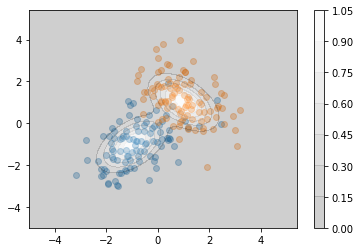

In [100]:
plt.scatter(signal[:, 0], signal[:, 1], alpha=0.3)
plt.scatter(bckgrd[:, 0], bckgrd[:, 1], alpha=0.3)

support = np.arange(-5.0, 5.5, 0.1)
X, Y = np.meshgrid(support, support)
Z = pdf(np.dstack([X, Y]))
cs = plt.contourf(X, Y, Z, alpha=0.2, cmap=plt.get_cmap('gray'))
cbar = plt.colorbar(cs)

### Exercise

#### Task 1
Create a plot of a Poisson distribution for $\lambda=5$, $\lambda=10$ and $\lambda=15$


#### Task 2
Plot the two functions 

$f(x) = sin(x)$

and

$f(x) = sin(x+ \frac{1}{8}\pi)* 1.1$

into one subplot and plot the absolute and relative difference between this functions in two other subplots.